# SETUP DATASET

In [53]:
import sklearn
print(sklearn.__version__)

1.5.0


In [3]:
import pandas as pd

In [4]:
data_indikator_diabetes = pd.read_csv("DATASET/sample_data_proportional.csv")

In [5]:
data_indikator_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                10000 non-null  float64
 1   HighChol              10000 non-null  float64
 2   CholCheck             10000 non-null  float64
 3   BMI                   10000 non-null  float64
 4   Smoker                10000 non-null  float64
 5   Stroke                10000 non-null  float64
 6   HeartDiseaseorAttack  10000 non-null  float64
 7   PhysActivity          10000 non-null  float64
 8   Fruits                10000 non-null  float64
 9   Veggies               10000 non-null  float64
 10  HvyAlcoholConsump     10000 non-null  float64
 11  AnyHealthcare         10000 non-null  float64
 12  NoDocbcCost           10000 non-null  float64
 13  GenHlth               10000 non-null  float64
 14  MentHlth              10000 non-null  float64
 15  PhysHlth            

In [6]:
data_indikator_diabetes['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    8471
1.0    1529
Name: count, dtype: int64

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# NORMAL RANDOM FOREST

In [43]:
# Memisahkan fitur dan label
X = data_indikator_diabetes.drop('Diabetes_binary', axis=1)
y = data_indikator_diabetes['Diabetes_binary']

In [44]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Membuat pipeline untuk scaling dan model
pipeline = RandomForestClassifier()

In [46]:
normal_random_forest = pipeline.fit(X_train, y_train)
normal_random_forest

RandomForestClassifier()

In [47]:
# Evaluasi model di data pengujian
y_pred = normal_random_forest.predict(X_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy on test set:  0.866
Classification report:
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.93      1734
         1.0       0.49      0.16      0.24       266

    accuracy                           0.87      2000
   macro avg       0.69      0.57      0.58      2000
weighted avg       0.83      0.87      0.84      2000



In [48]:
# Cross-validation score
cross_val_scores = cross_val_score(normal_random_forest, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

Cross-validation scores:  [0.848  0.8375 0.8435 0.843  0.8475]
Mean cross-validation score:  0.8439


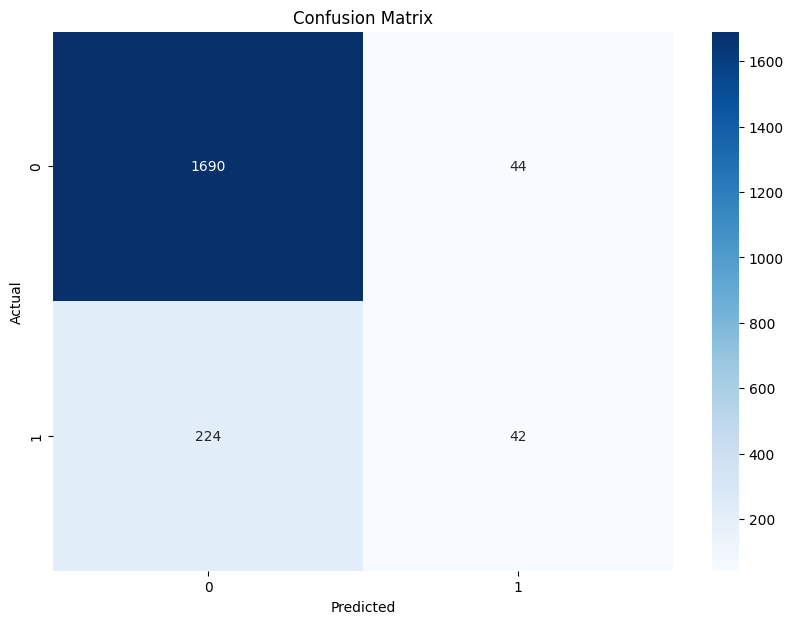

In [49]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(normal_random_forest, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

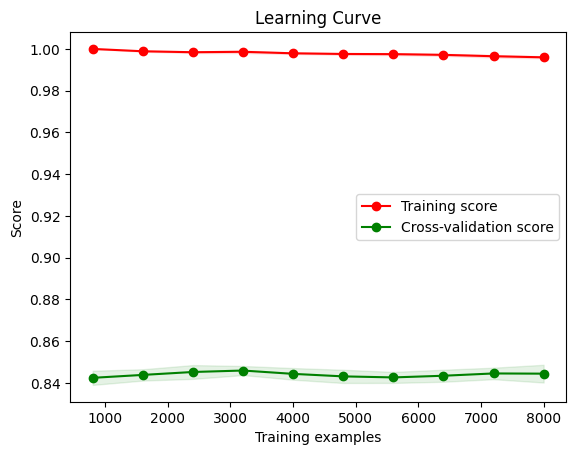

In [51]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [52]:
# Menyimpan hasil prediksi ke file CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('Normal_classification_results_RF.csv', index=False)

# Simpan model ke file
with open('Normal_trained_model_RF.pkl', 'wb') as file:
    pickle.dump(normal_random_forest, file)

# GRIDSEARCH RANDOM FOREST

In [18]:
# Memisahkan fitur dan label
X = data_indikator_diabetes.drop('Diabetes_binary', axis=1)
y = data_indikator_diabetes['Diabetes_binary']

In [19]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Membuat pipeline untuk scaling dan model
pipeline = RandomForestClassifier()

In [21]:
# Menentukan parameter grid untuk GridSearchCV
param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [22]:
# Menggunakan GridSearchCV untuk mencari parameter terbaik
rf_grid_search = GridSearchCV(pipeline, param, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)
rf_grid_search

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [23]:
# Evaluasi model di data pengujian
y_pred = rf_grid_search.predict(X_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy on test set:  0.875
Classification report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1734
         1.0       0.77      0.09      0.16       266

    accuracy                           0.88      2000
   macro avg       0.82      0.54      0.54      2000
weighted avg       0.86      0.88      0.83      2000



In [24]:
# Menampilkan parameter terbaik
print("Best parameters found: ", rf_grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [25]:
# Cross-validation score
cross_val_scores = cross_val_score(rf_grid_search, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

Cross-validation scores:  [0.852  0.8465 0.848  0.8495 0.85  ]
Mean cross-validation score:  0.8492


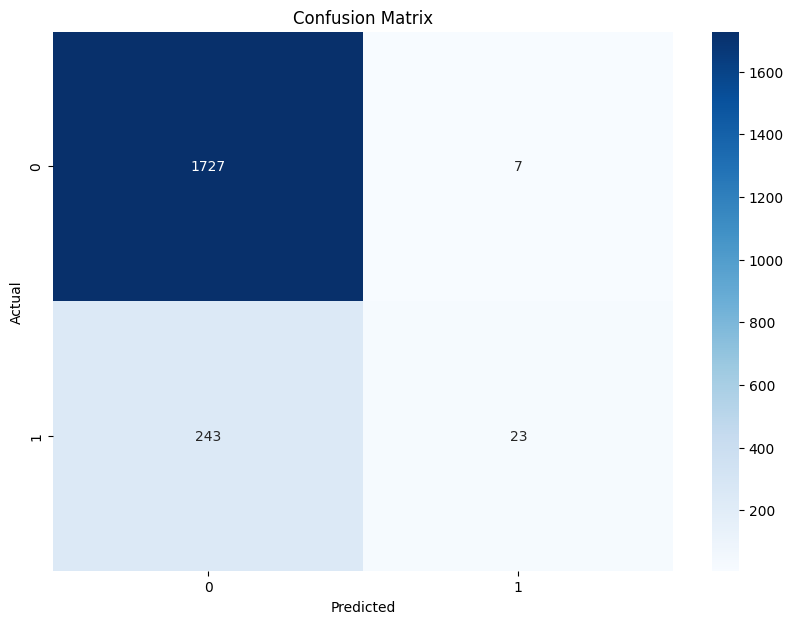

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf_grid_search.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

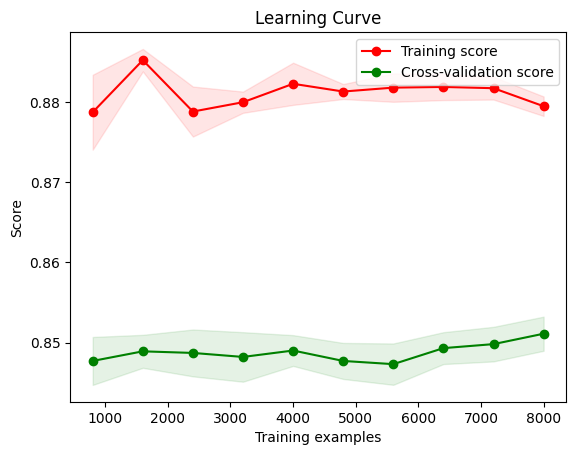

In [28]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [29]:
# Menyimpan hasil prediksi ke file CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('GridSearch_classification_results_RF.csv', index=False)

# Simpan model ke file
with open('GridSearch_trained_model_RF.pkl', 'wb') as file:
    pickle.dump(rf_grid_search, file)

# RANDOMSEARCH RANDOM FOREST

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
# Memisahkan fitur dan label
X = data_indikator_diabetes.drop('Diabetes_binary', axis=1)
y = data_indikator_diabetes['Diabetes_binary']

In [32]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Membuat pipeline untuk scaling dan model
pipeline = RandomForestClassifier()

In [34]:
# Menentukan parameter grid untuk GridSearchCV
param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
# Menggunakan GridSearchCV untuk mencari parameter terbaik
rf_random_search = RandomizedSearchCV(pipeline, param, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
rf_random_search.fit(X_train, y_train)
rf_random_search

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=2)

In [36]:
# Evaluasi model pada data pengujian
y_pred = rf_random_search.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Test Accuracy:  0.871
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      1734
         1.0       0.59      0.10      0.17       266

    accuracy                           0.87      2000
   macro avg       0.73      0.54      0.55      2000
weighted avg       0.84      0.87      0.83      2000



In [37]:
# Menampilkan parameter terbaik
print("Best parameters found: ", rf_random_search.best_params_)

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}


In [38]:
# Cross-validation score
cross_val_scores = cross_val_score(rf_random_search.best_estimator_, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

Cross-validation scores:  [0.8525 0.847  0.8475 0.852  0.8505]
Mean cross-validation score:  0.8499000000000001


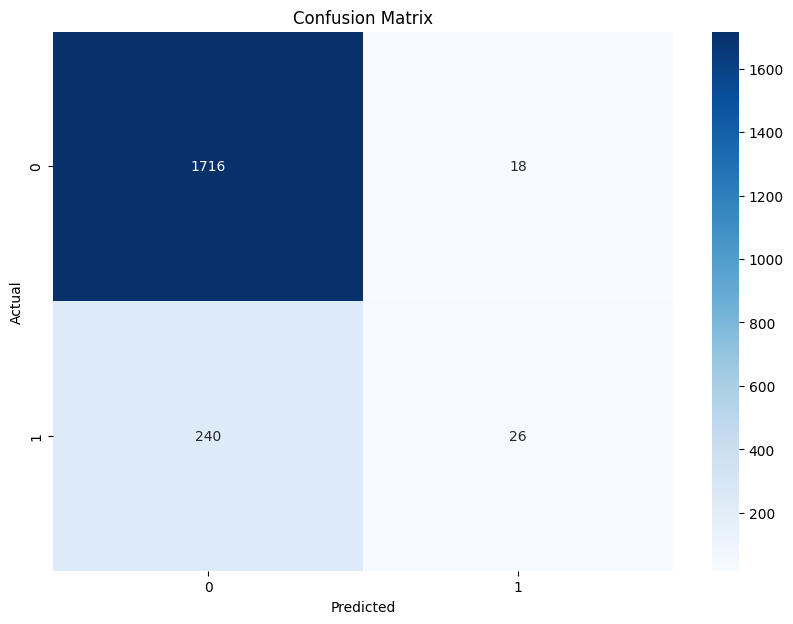

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf_random_search.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

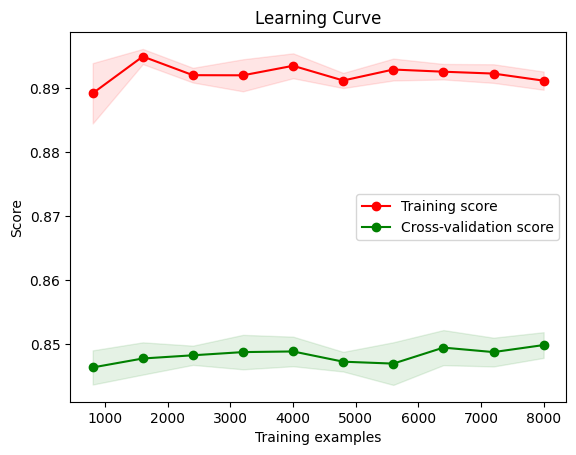

In [41]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [42]:
# Menyimpan hasil prediksi ke file CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('RandomSearch_classification_results_RF.csv', index=False)

# Simpan model ke file
with open('RandomSearch_trained_model_RF.pkl', 'wb') as file:
    pickle.dump(rf_random_search, file)